In [1]:
import pandas as pd

columns = ['sepal-length', 'sepal-width', 'length', 'width', 'outcome']
df = pd.read_csv('iris_data.csv', names=columns)

df.head(10)

,sepal-length,sepal-width,length,width,outcome
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [2]:
pwd


'/Users/abbystokes/Documents/GitHub/AST5731'

In [3]:
# plot data
import matplotlib.pyplot as plt 
mat = df['petal-length']
por = df['petal-width']
plt.scatter(mat, por, label="sampled data")
plt.legend(loc=0)

KeyError: 'petal-length'

In [ ]:
# linear regression

from sklearn.linear_model import LinearRegression

length, width = df["length"].values, df["width"].values

linear_model = LinearRegression().fit(mat.reshape(-1, 1), por)
predict_line = linear_model.predict(mat.reshape(-1, 1))

[0.41641913] -0.3665140452167295


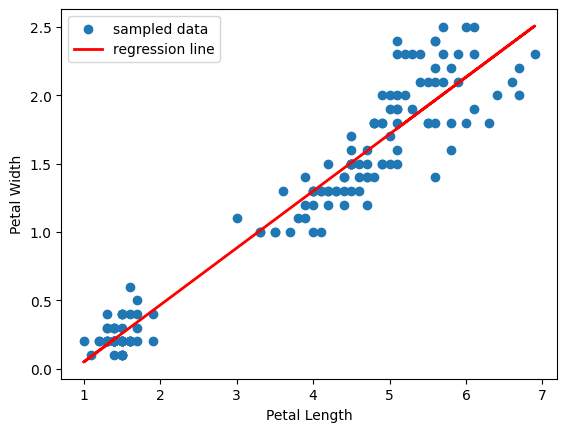

In [ ]:
#plot line
plt.scatter(mat, por, label="sampled data")
plt.plot(mat, predict_line, label="regression line", lw=2.0, color="red")
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend(loc=0)

print(linear_model.coef_, 
linear_model.intercept_)

In [ ]:
import bambi as bmb

gauss_model = bmb.Model('length ~ width', data=df)

In [ ]:
pip install bambi

  Obtaining dependency information for bambi from https://files.pythonhosted.org/packages/69/91/9ab76ca5c16433b9173ff74d5cabc83538dfaa3755878deaf47b26bbb305/bambi-0.12.0-py3-none-any.whl.metadata
  Obtaining dependency information for formulae>=0.5.0 from https://files.pythonhosted.org/packages/ad/2c/6801494a1ea4d4496699fd27f92cee9ff54dadc5e557d4d0e5cb1f97b626/formulae-0.5.1-py3-none-any.whl.metadata
  Obtaining dependency information for pymc>=5.5.0 from https://files.pythonhosted.org/packages/45/89/341da7baee2d8e6e2654e50ebc4d1dca49c762a8a132b6cd6cb1eae1fa80/pymc-5.9.0-py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 23.2 MB/s eta 0:00:0000:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Obtaining dependency information for cachetools>=4.2.1 from https://files.pythonhosted.org/packages/a9/c9/c8a7710f2cedcb1db9224

In [ ]:
# use PyMC3 to draw 1000 samples from each of 4 chains

# Fit the model using 1000 on each of 4 chains
gauss_fitted = gauss_model.fit(draws=1000, chains=4)
gauss_model.predict(gauss_fitted, kind="pps", draws=1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [length_sigma, Intercept, width]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 1 seconds.


TypeError: Model.predict() got an unexpected keyword argument 'draws'

In [ ]:
# Analyze distribution of coeff
import arviz as az

az.plot_trace(gauss_fitted, var_names=["Intercept", "mat"])

print(gauss_fitted.posterior.mat.values.mean(),gauss_fitted.posterior.Intercept.values.mean())

In [ ]:
# plot regression lines

# Plot Data
plt.scatter(mat, por, label="data")

# Values of x-axis
x_range = np.linspace(min(mat), max(mat), 2000)

# Plot sample predictions
for i in range(10):
    y_pred = (fitted.posterior.mat.values[0, i] * x_range 
              + gauss_fitted.posterior.Intercept.values[0, i])
    
    plt.plot(x_range, y_pred,
        color="green",linestyle="--",
        label="Mean regression line"
        )

In [ ]:
# use mean of beta to get single estimate for y

# Plot Data
plt.scatter(mat, por, label="data")

# Values of x-axis
x_range = np.linspace(min(mat), max(mat), 2000)

y_pred = fitted.posterior.mat.values.mean() * x_range + fitted.posterior.Intercept.values.mean()

# Plot mean prediction    
plt.plot(x_range, y_pred,
        color="black",
        label="Mean regression line",
        linewidth = 3
        )

# Plot sample predictions

In [ ]:
#plot distirbution of all predictions
az.plot_ppc(gauss_fitted)

In [ ]:
#Plot high density interval of predictions

# Plot Data
plt.scatter(mat, por, label="data")

x_range = np.linspace(min(mat), max(mat), 2000)
y_pred = fitted.posterior.mat.values.mean() * x_range + fitted.posterior.Intercept.values.mean()

# Plot mean prediction  
plt.plot(x_range, y_pred,color="black", label="Mean regression line")
        
# Plot HDIs
for interval in [0.38, 0.68]:
    az.plot_hdi(mat, fitted.posterior_predictive.por, 
                hdi_prob=interval, color="firebrick")   #HDI means high density interval

plt.legend(loc=0)